In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [99]:
# Import the file from https://www-nds.iaea.org/relnsd/vcharthtml/VChartHTML.html
# Go to gamma table, download csv, upload file to this folder, rename file to the corresponding isotope 

# Bring file to the code
# Change this for every raw data file for each isotope
file = 'Cs140-Raw.csv'   

# Make/open a file for writing the Geant 4 accepted format of histogram
w = open('Cs140-G4Hist.dat','w')  

# Define names of columns of interest
names = ['energy','intensity']

# Import only columns of interest from file
data = pd.read_csv(file, header = 0, usecols=[0,2], names=names, nrows=28)

# Print data and check that it matches with what is on livechart
# print(data)

# Divide by 1000 to convert from keV to MeV because this is what Geant4 takes as input
energy_kev = data['energy']/1000

filler_em = energy_kev-0.0001
filler_ep = energy_kev+0.0001
filler_i = data['energy']*0

num_rows = len(data)

# Make array for the energy data
energy_dat = [0]
intensity_dat = [0]
 
for i in range(num_rows):
    energy_dat.append(filler_em[i])
    energy_dat.append(energy_kev[i])
    energy_dat.append(filler_ep[i])
    
    intensity_dat.append(0)
    intensity_dat.append(data['intensity'][i])
    intensity_dat.append(0)
    
#print(energy_dat)
#print(intensity_dat)

# Find length of energy_dat
num_dat = len(energy_dat)

# Write a for loop to write into the .dat file
for i in range(num_dat):
    w.write(str(energy_dat[i]))
    w.write(' ')
    w.write(str(intensity_dat[i]))
    w.write('\n')

# Close the file
w.close()

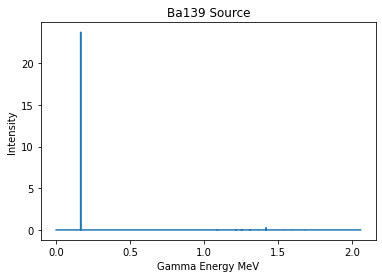

In [98]:
# Plot data to see what is going on 
#plt.clf()
#plt.plot(energy_dat,intensity_dat)
##plt.xlim(0,0.2)
##plt.ylim(0,5)

#plt.title('Ba139 Source')
#plt.xlabel('Gamma Energy MeV')
#plt.ylabel('Intensity')

#plt.savefig('Ba139-source.jpg')
#plt.show()